<a href="https://colab.research.google.com/github/ravisankarg/notebooks/blob/main/chunking_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install datasets

In [19]:
from datasets import load_dataset

# Load the dataset. We'll use the 'v2' version which includes arguments and topics.
# The dataset might be large, so we can filter or sample later if needed.
dataset = load_dataset("webis/touche2020", "v2")

# Display the dataset structure
print(dataset)

# Display information about the splits
print(dataset.keys())

# Display a sample from one of the splits (e.g., 'arguments')
if 'arguments' in dataset:
    print("\nSample from 'arguments' split:")
    print(dataset['arguments'][0])

# Display a sample from the 'topics' split
if 'topics' in dataset:
    print("\nSample from 'topics' split:")
    print(dataset['topics'][0])

# Display a sample from the 'qrels' split (relevance judgments) if it exists
if 'qrels' in dataset:
    print("\nSample from 'qrels' split:")
    print(dataset['qrels'][0])

DatasetNotFoundError: Dataset 'webis/touche2020' doesn't exist on the Hub or cannot be accessed.

In [1]:
from datasets import load_dataset

# Attempt to load a subset of the MS MARCO passage dataset
# We'll try loading the 'validation' split, which is usually smaller than 'train'.
# The specific dataset name and configuration might need adjustment based on
# what's available on the Hugging Face Hub.
try:
    # Trying a common configuration for MS MARCO passages
    dataset = load_dataset("pyserini/msmarco-passage", "v1.0", split="validation")
    print("Successfully loaded the dataset.")
    print(dataset)
    print(dataset.column_names)
    print("\nSample data:")
    print(dataset[0])

except Exception as e:
    print(f"Could not load dataset 'pyserini/msmarco-passage' with config 'v1.0' and split 'validation'. Error: {e}")
    print("Trying another common MS MARCO configuration...")
    try:
        # Trying another possible configuration/split
        dataset = load_dataset("ms_marco", "v1.1", "validation")
        print("Successfully loaded the dataset.")
        print(dataset)
        print(dataset.column_names)
        print("\nSample data:")
        print(dataset[0])
    except Exception as e2:
        print(f"Could not load dataset 'ms_marco' with config 'v1.1' and split 'validation'. Error: {e2}")
        print("\nCould not load a standard MS MARCO passage dataset automatically.")
        print("Please refer to the Hugging Face Datasets documentation for 'ms_marco' or 'pyserini/msmarco-passage' to find the correct loading parameters.")
        print("You might need to specify a different configuration or split.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Could not load dataset 'pyserini/msmarco-passage' with config 'v1.0' and split 'validation'. Error: Dataset 'pyserini/msmarco-passage' doesn't exist on the Hub or cannot be accessed.
Trying another common MS MARCO configuration...


README.md: 0.00B [00:00, ?B/s]

Could not load dataset 'ms_marco' with config 'v1.1' and split 'validation'. Error: The directory at hf://datasets/ms_marco@a47ee7aae8d7d466ba15f9f0bfac3b3681087b3a/validation doesn't contain any data files

Could not load a standard MS MARCO passage dataset automatically.
Please refer to the Hugging Face Datasets documentation for 'ms_marco' or 'pyserini/msmarco-passage' to find the correct loading parameters.
You might need to specify a different configuration or split.


README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/287 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/287 [00:00<?, ?it/s]

Successfully loaded a subset of the Natural Questions dataset.
IterableDataset({
    features: ['id', 'document', 'question', 'long_answer_candidates', 'annotations'],
    num_shards: 287
})

Sample data (streaming):
Example 1:
{'id': '4549465242785278785', 'document': {'html': '<!DOCTYPE html>\n<HTML class="client-js ve-not-available" lang="en" dir="ltr"><HEAD>\n\n<TITLE>The Walking Dead (season 8) - Wikipedia</TITLE>\n\n\n<LINK rel="stylesheet" href="/w/load.php?debug=false&amp;lang=en&amp;modules=ext.cite.styles%7Cext.timeline.styles%7Cext.uls.interlanguage%7Cext.visualEditor.desktopArticleTarget.noscript%7Cext.wikimediaBadges%7Cmediawiki.legacy.commonPrint%2Cshared%7Cmediawiki.sectionAnchor%7Cmediawiki.skinning.interface%7Cskins.vector.styles%7Cwikibase.client.init&amp;only=styles&amp;skin=vector" />\n\n<STYLE>\n.referencetooltip{position:absolute;list-style:none;list-style-image:none;opacity:0;font-size:10px;margin:0;z-index:5;padding:0}.referencetooltip li{border:#080086 2px soli
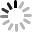
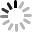
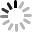

In [2]:
from datasets import load_dataset

# Attempt to load a subset of the Natural Questions (NQ) dataset
# We'll try the 'train' split with a small shard for demonstration, or a validation split if available and smaller.
try:
    # Trying to load a small part of the train split
    # The exact configuration might vary, so we might need to adjust
    dataset = load_dataset("natural_questions", split="train", streaming=True).take(1000) # Load first 1000 examples in streaming mode

    print("Successfully loaded a subset of the Natural Questions dataset.")
    # Note: In streaming mode, dataset object might not show full structure immediately
    print(dataset)
    # We can iterate through a few examples to see the structure
    print("\nSample data (streaming):")
    for i, example in enumerate(dataset.take(3)):
        print(f"Example {i+1}:")
        print(example)
        print("-" * 20)
    # To get column names in streaming mode, you might need to inspect an example
    if dataset.features:
        print("\nDataset features (columns):")
        print(dataset.features)


except Exception as e:
    print(f"Could not load Natural Questions dataset. Error: {e}")
    print("\nCould not load a standard Natural Questions dataset automatically.")
    print("Please refer to the Hugging Face Datasets documentation for 'natural_questions' to find the correct loading parameters.")
    print("You might need to specify a different configuration, split, or loading method.")

In [7]:
from bs4 import BeautifulSoup

# Preprocess the Natural Questions dataset
# Extract documents and queries, and clean document text

documents = []
queries = []
# We need to keep track of the original document associated with each query for ground truth
# This will now map query index to the original document index in the 'documents' list
query_document_map = {}
document_index = 0 # To keep track of the index in the 'documents' list

# Iterate through the loaded dataset (which is a streaming dataset subset)
for i, example in enumerate(dataset):
    # Extract document HTML
    document_html = example['document']['html']
    query_text = example['question']['text']

    # Use BeautifulSoup to parse HTML and extract text
    soup = BeautifulSoup(document_html, 'html.parser')
    document_text = soup.get_text(separator=' ', strip=True) # Extract text, using space as separator and stripping whitespace

    if document_text and query_text: # Only add if both document text and query are not empty
        documents.append(document_text)
        queries.append(query_text)
        # Store the mapping from query index to original document index
        query_document_map[len(queries) - 1] = document_index
        document_index += 1 # Increment document index only when a valid document is added


print(f"Extracted and cleaned {len(documents)} documents and {len(queries)} queries from the dataset subset.")

# Optional: Print a sample of cleaned data
# print("\nSample Preprocessed Data (Cleaned Document):")
# if documents:
#     print(f"Document 1: {documents[0][:500]}...")
# if queries:
#     print(f"Query 1: {queries[0]}")
# print("-" * 20)
# print(f"Query-Document Map Sample (first 5 queries): {list(query_document_map.items())[:5]}")

Extracted and cleaned 1000 documents and 1000 queries from the dataset subset.


In [8]:
# Optional: Print a sample
print("\nSample Preprocessed Data:")
print(f"Document 1: {documents[0][:512]}...")
print(f"Query 1: {queries[0]}")
print("-" * 20)
print(f"Query-Document Map Sample: {list(query_document_map.items())[:5]}")


Sample Preprocessed Data:
Document 1: The Walking Dead (season 8) - Wikipedia The Walking Dead (season 8) From Wikipedia, the free encyclopedia Jump to: navigation , search The Walking Dead (season 8) Promotional poster Starring Andrew Lincoln Norman Reedus Lauren Cohan Chandler Riggs Danai Gurira Melissa McBride Lennie James Alanna Masterson Josh McDermitt Christian Serratos Seth Gilliam Ross Marquand Jeffrey Dean Morgan Austin Amelio Tom Payne Xander Berkeley Khary Payton Steven Ogg Katelyn Nacon Pollyanna McIntosh Country of origin United St...
Query 1: when is the last episode of season 8 of the walking dead
--------------------
Query-Document Map Sample: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]


In [6]:
!pip install beautifulsoup4

In [9]:
# Implement Fixed 512 Chunking
fixed_chunks = []
# We'll also need to store the original document index for each chunk for evaluation
fixed_chunks_with_info = []

chunk_size = 512

for doc_index, document in enumerate(documents):
    # Simple tokenization by splitting on whitespace for demonstration
    tokens = document.split()
    # Create fixed-size chunks (approximate 512 tokens)
    for i in range(0, len(tokens), chunk_size):
        chunk = " ".join(tokens[i:i + chunk_size])
        if chunk: # Add chunk only if it's not empty
            fixed_chunks.append(chunk)
            fixed_chunks_with_info.append((chunk, doc_index))

print(f"Generated {len(fixed_chunks)} fixed-size chunks.")
# Optional: Print a sample
# print("\nSample fixed chunks:")
# for i, (chunk, doc_idx) in enumerate(fixed_chunks_with_info[:5]):
#     print(f"Chunk {i+1} (Doc {doc_idx}): {chunk[:100]}...")
#     print("-" * 20)

Generated 12676 fixed-size chunks.


In [15]:
# Implement Hierarchical Chunking (Two Levels: Document and Sentence)
hierarchical_chunks = []
# We'll store tuples of (chunk_text, original_document_index, chunk_type)
# chunk_type will be 'document' or 'sentence'
hierarchical_chunks_with_info = []

# To easily retrieve sentences belonging to a document later
document_sentences_list = []

for doc_index, document in enumerate(documents):
    # Add the entire document as a chunk
    hierarchical_chunks.append(document)
    hierarchical_chunks_with_info.append((document, doc_index, 'document'))

    # Split into sentences
    sentences = document.split('. ')
    # Add the period back to each sentence and filter out empty strings
    sentences = [s + '.' if s and i < len(sentences) - 1 else s for i, s in enumerate(sentences) if s]

    # Store sentences for this document
    document_sentences_list.append(sentences)

    # Add each sentence as a hierarchical chunk
    for sentence in sentences:
        hierarchical_chunks.append(sentence)
        hierarchical_chunks_with_info.append((sentence, doc_index, 'sentence'))


print(f"Generated {len(hierarchical_chunks)} hierarchical chunks (documents and sentences).")
# Optional: Print a sample
print("\nSample hierarchical chunks:")
for i, (chunk, doc_idx, chunk_type) in enumerate(hierarchical_chunks_with_info[:10]):
    print(f"Chunk {i+1} (Doc {doc_idx}, Type: {chunk_type}): {chunk[:100]}...")
    print("-" * 20)

Generated 365461 hierarchical chunks (documents and sentences).

Sample hierarchical chunks:
Chunk 1 (Doc 0, Type: document): The Walking Dead (season 8) - Wikipedia The Walking Dead (season 8) From Wikipedia, the free encyclo...
--------------------
Chunk 2 (Doc 0, Type: sentence): The Walking Dead (season 8) - Wikipedia The Walking Dead (season 8) From Wikipedia, the free encyclo...
--------------------
Chunk 3 (Doc 0, Type: sentence): of episodes 9 Release Original network AMC Original release October 22, 2017 ( 2017-10-22 ) – presen...
--------------------
Chunk 4 (Doc 0, Type: sentence): [3] Developed for television by Frank Darabont , the series is based on the eponymous series of comi...
--------------------
Chunk 5 (Doc 0, Type: sentence): The executive producers are Kirkman, David Alpert, Scott M....
--------------------
Chunk 6 (Doc 0, Type: sentence): Gimple , Greg Nicotero , Tom Luse , and Gale Anne Hurd , with Gimple as showrunner for the fifth con...
--------------------


In [16]:
# Generate Embeddings
# Use the pre-loaded 'model' from the earlier steps (SentenceTransformer('all-MiniLM-L12-v2'))

fixed_chunk_embeddings = model.encode(fixed_chunks, convert_to_tensor=True)
hierarchical_chunk_embeddings = model.encode(hierarchical_chunks, convert_to_tensor=True)
query_embeddings = model.encode(queries, convert_to_tensor=True)


print(f"Shape of fixed chunk embeddings: {fixed_chunk_embeddings.shape}")
print(f"Shape of hierarchical chunk embeddings: {hierarchical_chunk_embeddings.shape}")
print(f"Shape of query embeddings: {query_embeddings.shape}")

Shape of fixed chunk embeddings: torch.Size([12676, 384])
Shape of hierarchical chunk embeddings: torch.Size([365461, 384])
Shape of query embeddings: torch.Size([1000, 384])


In [12]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L12-v2')

print("SentenceTransformer model loaded.")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer model loaded.


In [17]:
# Perform Retrieval
import torch
from sentence_transformers import util # Make sure util is imported

# For Fixed Chunking (remains the same)
fixed_chunk_retrieval_results = []
for query_embedding in query_embeddings:
    # Calculate cosine similarity between the query and all fixed chunks
    scores = util.dot_score(query_embedding, fixed_chunk_embeddings)[0]
    # Get the index of the chunk with the highest similarity
    best_chunk_index = torch.argmax(scores).item()
    fixed_chunk_retrieval_results.append(best_chunk_index)

print(f"Retrieved {len(fixed_chunk_retrieval_results)} best fixed chunks for queries.")

# For Hierarchical Chunking (Two Levels: Document and Sentence)
hierarchical_retrieval_results = [] # Store the index of the best hierarchical chunk (either doc or sentence)

# Separate document and sentence embeddings and their info for easier access
doc_embeddings = torch.stack([hierarchical_chunk_embeddings[i] for i, info in enumerate(hierarchical_chunks_with_info) if info[2] == 'document'])
doc_info = [info for info in hierarchical_chunks_with_info if info[2] == 'document']

sentence_embeddings = torch.stack([hierarchical_chunk_embeddings[i] for i, info in enumerate(hierarchical_chunks_with_info) if info[2] == 'sentence'])
sentence_info = [info for info in hierarchical_chunks_with_info if info[2] == 'sentence']


for query_embedding in query_embeddings:
    # Calculate similarity with document embeddings
    doc_scores = util.dot_score(query_embedding, doc_embeddings)[0]
    # Calculate similarity with sentence embeddings
    sentence_scores = util.dot_score(query_embedding, sentence_embeddings)[0]

    # Find the best score across both levels
    max_doc_score = torch.max(doc_scores)
    max_sentence_score = torch.max(sentence_scores)

    if max_doc_score >= max_sentence_score:
        # The best match is at the document level
        best_doc_index_in_doc_embeddings = torch.argmax(doc_scores).item()
        # Find the original index in hierarchical_chunks_with_info
        # We need to iterate through hierarchical_chunks_with_info to find the original index
        original_hierarchical_index = -1
        count_docs = 0
        for idx, info in enumerate(hierarchical_chunks_with_info):
            if info[2] == 'document':
                if count_docs == best_doc_index_in_doc_embeddings:
                    original_hierarchical_index = idx
                    break
                count_docs += 1
        hierarchical_retrieval_results.append(original_hierarchical_index)
    else:
        # The best match is at the sentence level
        best_sentence_index_in_sentence_embeddings = torch.argmax(sentence_scores).item()
         # Find the original index in hierarchical_chunks_with_info
        original_hierarchical_index = -1
        count_sentences = 0
        for idx, info in enumerate(hierarchical_chunks_with_info):
            if info[2] == 'sentence':
                if count_sentences == best_sentence_index_in_sentence_embeddings:
                    original_hierarchical_index = idx
                    break
                count_sentences += 1
        hierarchical_retrieval_results.append(original_hierarchical_index)


print(f"Retrieved {len(hierarchical_retrieval_results)} best hierarchical chunks (document or sentence) for queries.")

Retrieved 1000 best fixed chunks for queries.
Retrieved 1000 best hierarchical chunks (document or sentence) for queries.


In [18]:
# Evaluate Performance

# For Fixed Chunking: Check if the retrieved fixed chunk's original document
# index matches the ground truth document index for the query.
fixed_chunk_correct_retrievals = 0
for i, retrieved_fixed_chunk_index in enumerate(fixed_chunk_retrieval_results):
    # Get the original document index for the retrieved fixed chunk
    retrieved_doc_index = fixed_chunks_with_info[retrieved_fixed_chunk_index][1]
    # The ground truth document index for the query is stored in query_document_map
    ground_truth_doc_index = query_document_map[i]

    if retrieved_doc_index == ground_truth_doc_index:
        fixed_chunk_correct_retrievals += 1

fixed_chunk_precision = fixed_chunk_correct_retrievals / len(queries) if len(queries) > 0 else 0


# For Hierarchical Chunking: Check if the retrieved hierarchical chunk's
# original document index matches the ground truth document index for the query.
hierarchical_chunk_correct_retrievals = 0
for i, retrieved_hierarchical_chunk_index in enumerate(hierarchical_retrieval_results):
    # Get the original document index for the retrieved hierarchical chunk
    # We need to use hierarchical_chunks_with_info for this mapping
    retrieved_doc_index = hierarchical_chunks_with_info[retrieved_hierarchical_chunk_index][1]
    # The ground truth document index for the query is stored in query_document_map
    ground_truth_doc_index = query_document_map[i]

    if retrieved_doc_index == ground_truth_doc_index:
        hierarchical_chunk_correct_retrievals += 1

hierarchical_chunk_precision = hierarchical_chunk_correct_retrievals / len(queries) if len(queries) > 0 else 0


print(f"\n--- Evaluation Results (Retrieving Correct Document) ---")
print(f"Fixed 512 Chunking Precision: {fixed_chunk_precision:.4f}")
print(f"Hierarchical Chunking (Two Levels) Precision: {hierarchical_chunk_precision:.4f}")

# Note: This evaluation measures how often the retrieval strategy returns a chunk/sentence
# that belongs to the correct original document. A more granular evaluation could check
# if the *most relevant sentence* within that document was retrieved, but that requires
# identifying the relevant sentence in the original document for each query in the NQ dataset,
# which is not directly available in the subset format we loaded.


--- Evaluation Results (Retrieving Correct Document) ---
Fixed 512 Chunking Precision: 0.8810
Hierarchical Chunking (Two Levels) Precision: 0.8840


In [19]:
# Find and display one example where hierarchical chunking was correct

print("\n--- Example of Hierarchical Chunking Success ---")

found_example = False
for i, retrieved_hierarchical_chunk_index in enumerate(hierarchical_retrieval_results):
    # Get the original document index for the retrieved hierarchical chunk
    retrieved_doc_index = hierarchical_chunks_with_info[retrieved_hierarchical_chunk_index][1]
    # The ground truth document index for the query is stored in query_document_map
    ground_truth_doc_index = query_document_map[i]

    if retrieved_doc_index == ground_truth_doc_index:
        # Found a correct retrieval
        query = queries[i]
        original_document = documents[i] # Get the original document text
        retrieved_hierarchical_chunk, chunk_original_doc_index, chunk_type = hierarchical_chunks_with_info[retrieved_hierarchical_chunk_index]

        print(f"Query: {query}")
        print(f"Ground Truth Document Index: {ground_truth_doc_index}")
        print(f"Retrieved Hierarchical Chunk Index: {retrieved_hierarchical_chunk_index}")
        print(f"Retrieved Chunk's Original Document Index: {retrieved_doc_index}")
        print(f"Retrieved Chunk Type: {chunk_type}")
        print(f"Retrieved Chunk (starts with): {retrieved_hierarchical_chunk[:300]}...")
        print(f"Is Correct Document Retrieved? {'Yes' if retrieved_doc_index == ground_truth_doc_index else 'No'}")
        found_example = True
        break # Stop after finding the first example

if not found_example:
    print("Could not find an example of correct hierarchical retrieval in the results.")

print("-" * 50)


--- Example of Hierarchical Chunking Success ---
Query: when is the last episode of season 8 of the walking dead
Ground Truth Document Index: 0
Retrieved Hierarchical Chunk Index: 2
Retrieved Chunk's Original Document Index: 0
Retrieved Chunk Type: sentence
Retrieved Chunk (starts with): of episodes 9 Release Original network AMC Original release October 22, 2017 ( 2017-10-22 ) – present ( present ) Season chronology ← Previous Season 7 List of The Walking Dead episodes The eighth season of The Walking Dead , an American post-apocalyptic horror television series on AMC , premiered o...
Is Correct Document Retrieved? Yes
--------------------------------------------------


In [21]:
# Find and display one example where Hierarchical worked and Fixed did not

print("\n--- Example: Hierarchical Worked, Fixed Failed ---")

found_example = False
# Iterate through the queries of the Natural Questions dataset
for i, query in enumerate(queries):
    # Get ground truth document index for the current query
    ground_truth_doc_index = query_document_map[i]

    # Check Hierarchical Retrieval Result
    retrieved_hierarchical_chunk_index = hierarchical_retrieval_results[i]
    retrieved_hierarchical_doc_index = hierarchical_chunks_with_info[retrieved_hierarchical_chunk_index][1]
    hierarchical_worked = (retrieved_hierarchical_doc_index == ground_truth_doc_index)

    # Check Fixed Chunk Retrieval Result
    retrieved_fixed_chunk_index = fixed_chunk_retrieval_results[i]
    retrieved_fixed_doc_index = fixed_chunks_with_info[retrieved_fixed_chunk_index][1]
    fixed_worked = (retrieved_fixed_doc_index == ground_truth_doc_index)

    # Check if Hierarchical worked and Fixed failed
    if hierarchical_worked and not fixed_worked:
        print(f"Query: {query}")
        print(f"Ground Truth Document Index: {ground_truth_doc_index}")

        # Display Hierarchical Retrieval Details
        retrieved_hierarchical_chunk, chunk_original_doc_index, chunk_type = hierarchical_chunks_with_info[retrieved_hierarchical_chunk_index]
        print("\nHierarchical Retrieval:")
        print(f"  Retrieved Hierarchical Chunk Index: {retrieved_hierarchical_chunk_index}")
        print(f"  Retrieved Chunk's Original Document Index: {retrieved_hierarchical_doc_index}")
        print(f"  Retrieved Chunk Type: {chunk_type}")
        print(f"  Retrieved Chunk (starts with): {retrieved_hierarchical_chunk[:300]}...")
        print(f"  Is Correct Document Retrieved? {'Yes' if hierarchical_worked else 'No'}")


        # Display Fixed Chunk Retrieval Details
        retrieved_fixed_chunk_text = fixed_chunks[retrieved_fixed_chunk_index]
        # We need the original document index for the retrieved fixed chunk which is already available
        retrieved_fixed_doc_index_display = fixed_chunks_with_info[retrieved_fixed_chunk_index][1]

        print("\nFixed Chunk Retrieval:")
        print(f"  Retrieved Fixed Chunk Index: {retrieved_fixed_chunk_index}")
        print(f"  Retrieved Chunk's Original Document Index: {retrieved_fixed_doc_index_display}")
        print(f"  Retrieved Chunk (starts with): {retrieved_fixed_chunk_text[:300]}...")
        print(f"  Is Correct Document Retrieved? {'Yes' if fixed_worked else 'No'}")

        found_example = True
        break # Stop after finding the first example

if not found_example:
    print("Could not find an example where Hierarchical worked and Fixed failed in the results.")

print("-" * 50)


--- Example: Hierarchical Worked, Fixed Failed ---
Query: how many season of the man in the high castle
Ground Truth Document Index: 3

Hierarchical Retrieval:
  Retrieved Hierarchical Chunk Index: 1240
  Retrieved Chunk's Original Document Index: 3
  Retrieved Chunk Type: sentence
  Retrieved Chunk (starts with): [26] Reception [ edit ] The first season of The Man in the High Castle received acclaim from critics....
  Is Correct Document Retrieved? Yes

Fixed Chunk Retrieval:
  Retrieved Fixed Chunk Index: 3430
  Retrieved Chunk's Original Document Index: 272
  Retrieved Chunk (starts with): and Kalen Egan for Electric Shepherd and Spotnitz's Big Light Productions. [1] The pilot episode was released by Amazon Studios on January 15, 2015. [20] Amazon Studios' production process is somewhat different from those of other conventional television channels. They produce pilot episodes of a nu...
  Is Correct Document Retrieved? No
--------------------------------------------------
